In [18]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

data = pickle.load(open("final_dataset1.pkl", "rb"))



In [17]:
# item-item

def cos(a, b):
       #return np.dot(A, B)/(np.norm(A)*np.norm(B))
       return (a*b).sum() / ((a**2).sum() ** 0.5) / ((b**2).sum() ** 0.5)

def pearson(a, b):
    #return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
    a = a - a.mean()
    b = b - b.mean()
    return cos(a, b)


# 주석처리 된 pearson, cos으로 할 거면 -> np.array 없애면 됨.
A = np.array([ [2,3,5,2,3],
     [2,4,3,2,4],
     [5,3.5,4,2,3],
     [5,4,1,3,2],
     [2,4,3,5,1], 
])


for i in range(5):
    print(pearson(A[i], A[1]))
    
# A[0] A[2]

ans = (5 * 0.4082482904638631 + 4 * -0.11180339887498948) / (0.4082482904638631 + -0.11180339887498948)
print()
print(ans)


0.4082482904638631
1.0
-0.11180339887498948
-0.31622776601683794
-0.31622776601683794

5.37714732838117


In [32]:
# user-user

A = np.array([
    [2, 2, 5, 5, 2],
    [3, 4, 15/4, 4, 4],
    [5, 13/4, 4, 1, 3], 
    [2, 2, 2, 3, 5],
    [3, 4, 3, 2, 1],
])

for i in range(5):
    print(pearson(A[i], A[2]))
    
ans = (0.4076871241636056 * 4 + -0.3889222341312986 * 2) / (0.4076871241636056 -0.3889222341312986)
print()
print(ans)


-0.4629100498862758
-0.7563225565351133
1.0
-0.3889222341312986
0.4076871241636056

45.452119725903266


In [9]:
# 1번 gpt 코드

import numpy as np
from scipy.spatial.distance import cosine

# 시청자의 드라마 평점 행렬
ratings = np.array([
    [2, 2, 5, 5, 2],
    [3, 4, 3.5, 4, 4],
    [5, 3, 4, 1, 3],  # 시청자 C의 'SKY캐슬' 평점이 '?'로 표시됨
    [2, 2, 2, 3, 5],
    [3, 4, 3, 2, 1],
])

# Centered Cosine Similarity 계산 함수
def centered_cosine_similarity(vec1, vec2):
    mean_vec1 = np.mean(vec1)
    mean_vec2 = np.mean(vec2)
    
    centered_vec1 = vec1 - mean_vec1
    centered_vec2 = vec2 - mean_vec2
    
    similarity = 1 - cosine(centered_vec1, centered_vec2)
    
    return similarity

# 시청자 C가 평가한 다른 드라마들과 'SKY캐슬' 간의 유사도 계산
similarities = []
for i in range(ratings.shape[1]):
    if i != 2:  # 'SKY캐슬' 열은 제외
        similarity = centered_cosine_similarity(ratings[:, 2], ratings[:, i])
        similarities.append((i, similarity))

# 유사도가 높은 순서대로 정렬
similarities.sort(key=lambda x: x[1], reverse=True)

# 가장 유사도가 높은 2개의 드라마 선택
top_similar_dramas = similarities[:2]

# 가중 평균을 계산하여 예상 별점 출력
weighted_sum = 0
total_similarity = 0
for drama, similarity in top_similar_dramas:
    weighted_sum += similarity * ratings[2, drama]
    total_similarity += abs(similarity)

predicted_rating = weighted_sum / total_similarity

# 결과 출력
print(round(predicted_rating, 3))


2.362


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = []
Y = []

for k in range(1, 16):

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    #print(kmeans.inertia_)
    Y.append(kmeans.inertia_)
    X.append(k)
    

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

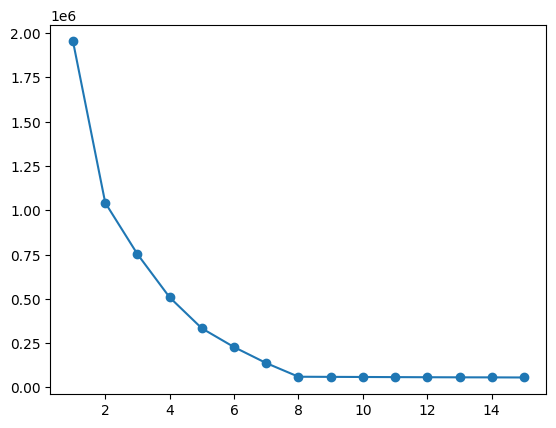

In [ ]:
plt.plot(X, Y, "-o")
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


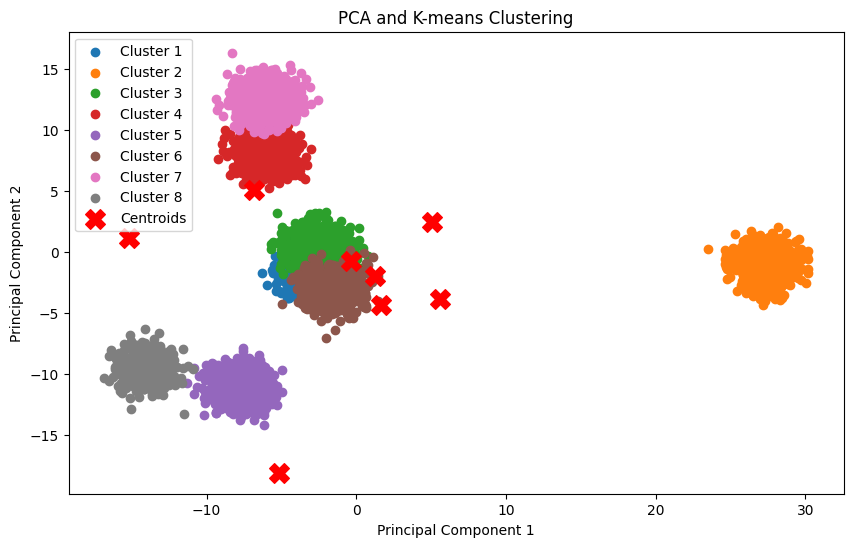

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



# PCA를 사용하여 2차원으로 데이터 변환
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# K-means 알고리즘을 사용하여 클러스터링 수행
kmeans = KMeans(n_clusters=8)
cluster_labels = kmeans.fit_predict(data)

# 클러스터 별로 다른 색으로 scatter plot 시각화
plt.figure(figsize=(10, 6))

for i in range(8):
    cluster_points = transformed_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('PCA and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [31]:
import numpy as np

# 주어진 데이터와 PC1 방향 벡터
data_point = np.array([3, 3, 9])
pc1_direction = np.array([2, 1, 2])

# PC1 방향으로의 사영 계산
projection = np.dot(data_point, pc1_direction) / np.dot(pc1_direction, pc1_direction) * pc1_direction
ans = data_point - projection

print(projection)
print(ans)


[6. 3. 6.]
[-3.  0.  3.]
